In [9]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report)
from imblearn.over_sampling import SMOTE

In [8]:
pd.read_csv('../data/raw/bank-marketing-campaign-data.csv')

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [14]:
df= pd.read_csv('../data/raw/bank-marketing-campaign-data.csv',
    sep=';',           # Separador es punto y coma
    quotechar='"')     # Comillas que envuelven los valores

# Limpiar comillas extras de los nombres de columnas
df.columns = df.columns.str.replace('"', '')

# Limpiar comillas extras de los valores
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('"', '')

print("Datos cargados y limpiados")
print(f"   Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas\n")
print("Primeras filas del dataset:")
df.head()

Datos cargados y limpiados
   Dimensiones: 41188 filas x 21 columnas

Primeras filas del dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [16]:
print("INFORMACIÓN DEL DATASET")
df.info()

print("\n" + "=" * 60)
print("ESTADÍSTICAS DE VARIABLES NUMÉRICAS")
print("=" * 60)
df.describe()

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.co

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [19]:
print("VERIFICACIÓN DE VALORES NULOS:")
nulos = df.isnull().sum()
if nulos.sum() == 0:
    print("No hay valores nulos en el dataset")
else:
    print(nulos[nulos > 0])

VERIFICACIÓN DE VALORES NULOS:
No hay valores nulos en el dataset


In [22]:
#ANALIZAR LA VARIABLE OBJETIVO
print(df['y'].value_counts())
print("\nPorcentajes:")
print(df['y'].value_counts(normalize=True) * 100)

y
no     36548
yes     4640
Name: count, dtype: int64

Porcentajes:
y
no    88.73
yes   11.27
Name: proportion, dtype: float64


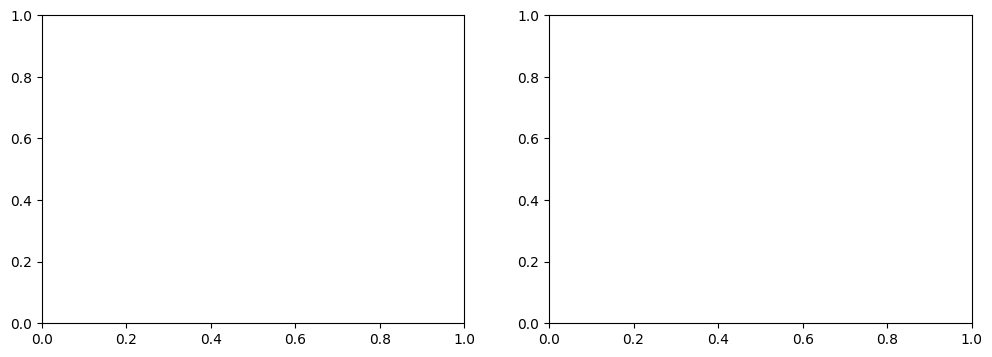

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


VISUALIZAR VARIABLES NUMÉRICAS

Variables numéricas encontradas: 10
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


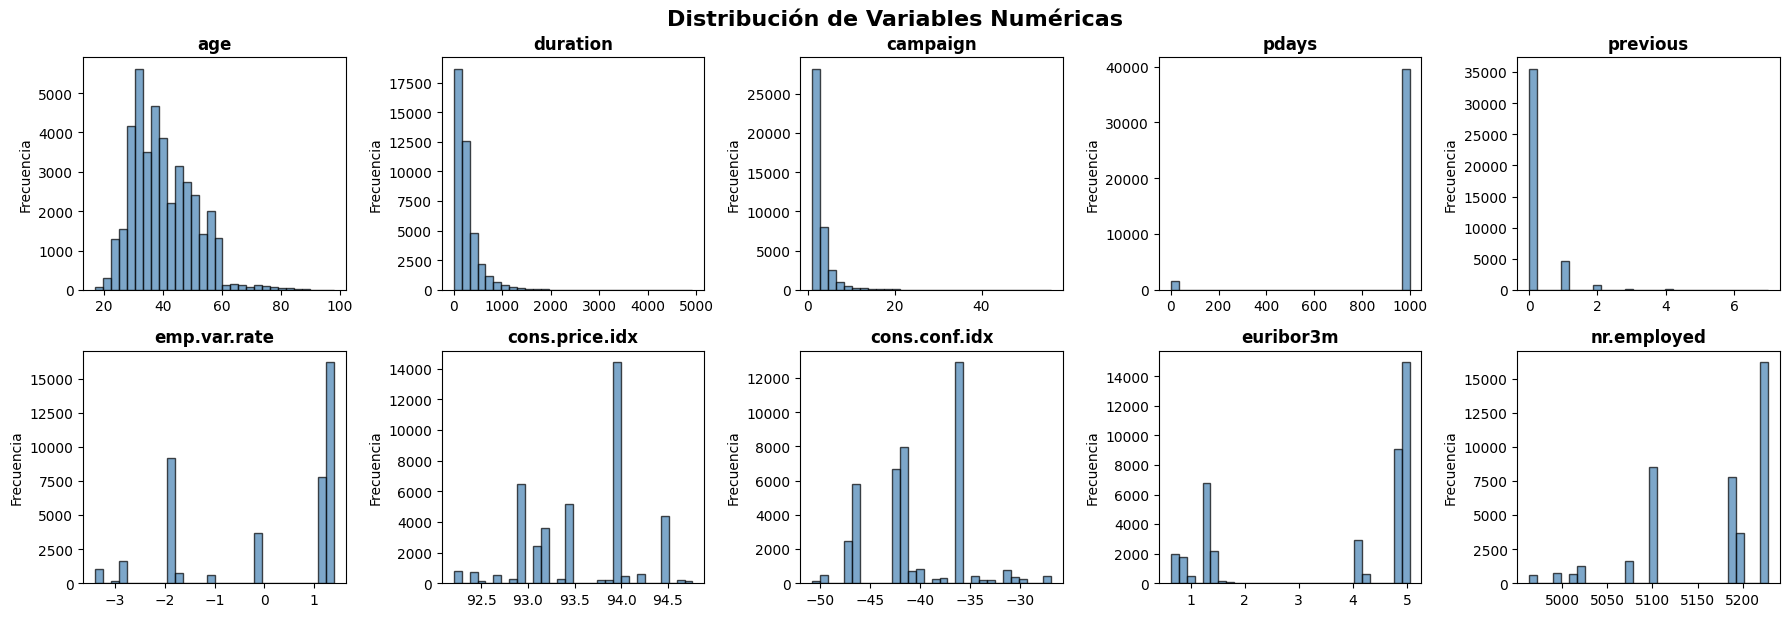

In [25]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Variables numéricas encontradas: {len(numeric_cols)}")
print(numeric_cols)

# Crear histogramas
fig, axes = plt.subplots(4, 5, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(col, fontweight='bold')
        axes[idx].set_ylabel('Frecuencia')

# Eliminar subplots vacíos
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()